# 1. Import Packages

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Load data

In [2]:
data = pd.read_csv("HPP_train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_cat = [col for col in data.columns.values if data[col].dtype == 'object' ]
data_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [5]:
cat_data = data[data_cat]

# 3. Data Preparation

In [6]:
# checking data types for variables in HousePrice dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# Checking data size
data.shape

(1460, 81)

# 3.1 Statistical Summary

In [8]:
# dataframe with categorical features
data.describe(include=['object']).transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [9]:
# dataframe with numerical features
data.describe(include=['int64','float64']).transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# 3.2 Spliting Target Variable

In [12]:
target = data['SalePrice']
target.dtype

dtype('int64')

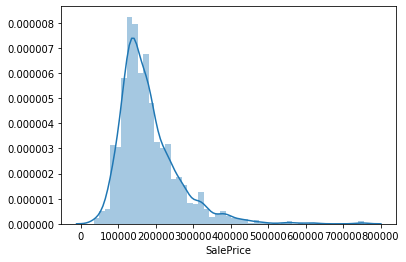

In [11]:
# Visualizing the distribution of Salesprice(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)
plt.show()

In [13]:
# Log transformation
import numpy as np
target_log  = np.log1p(target)

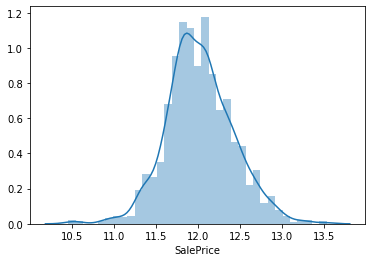

In [14]:
sns.distplot(target_log,hist=True)
plt.show()

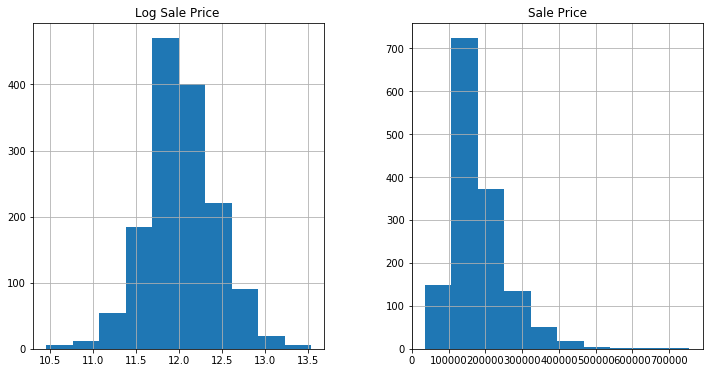

In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Sale Price":data["SalePrice"],"Log Sale Price ":target_log})
prices.hist()
plt.show()

In [16]:
# drop target variable from dataset
raw_data = data
data = data.drop(["SalePrice"], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# 3.3 Feature Engineering

In [17]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].astype(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [18]:
data['YrSold'].unique()

array(['2008', '2007', '2006', '2009', '2010'], dtype=object)

In [19]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data = data.drop(["TotalBsmtSF"], axis=1)
data = data.drop(["1stFlrSF"], axis=1)
data = data.drop(["2ndFlrSF"], axis=1)
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


# 3.4 Split Dataframe into numeric and categorical

In [20]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [21]:
# Using describe function in numeric dataframe 
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,11752.000000


In [22]:
# Printing 5 head observation in categorical dataframe
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


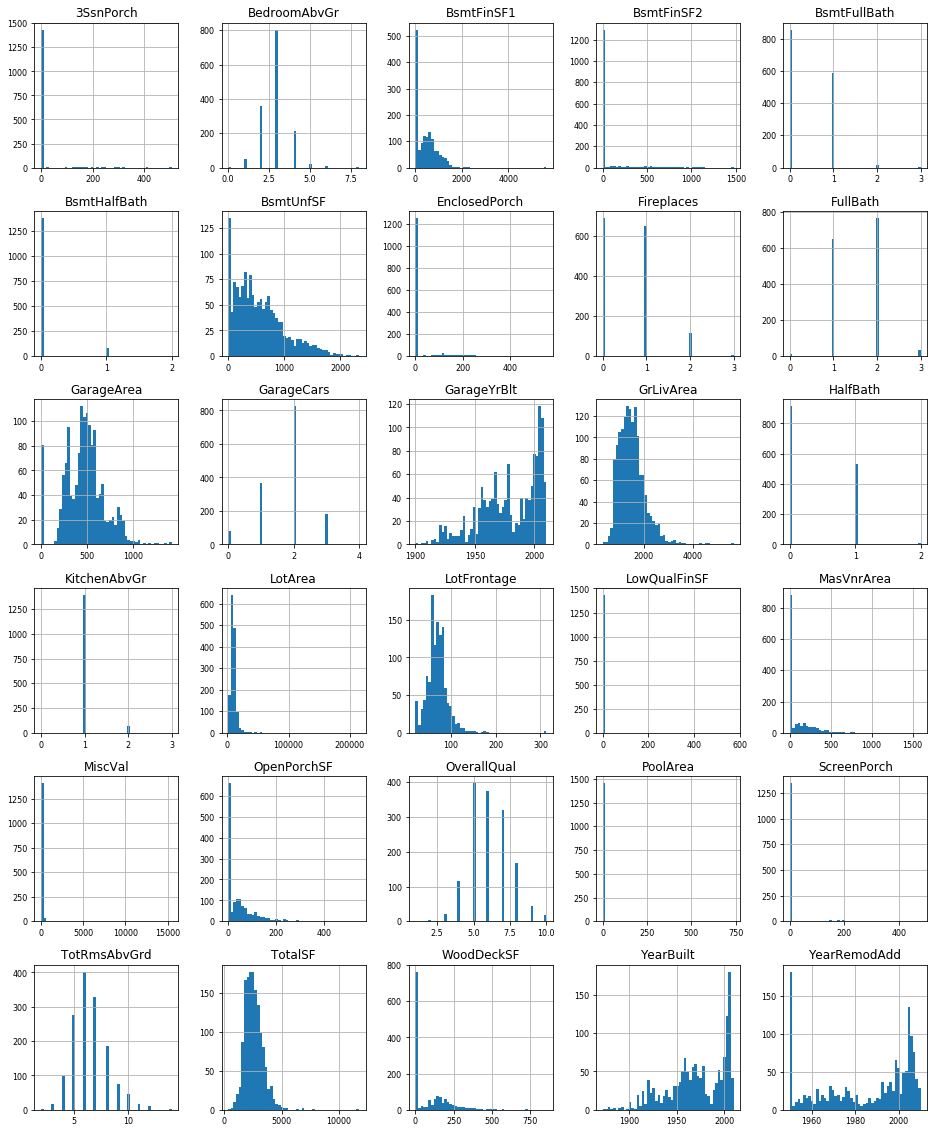

In [23]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [25]:
data_num_skew = data_num.skew()

In [26]:
data_num_skew

LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
TotalSF           1.776700
dtype: float64

In [27]:
data_num_skew = data_num_skew[data_num_skew > .75]

In [28]:
data_num_skew

LotFrontage       2.163569
LotArea          12.207688
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
TotalSF           1.776700
dtype: float64

In [29]:
# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

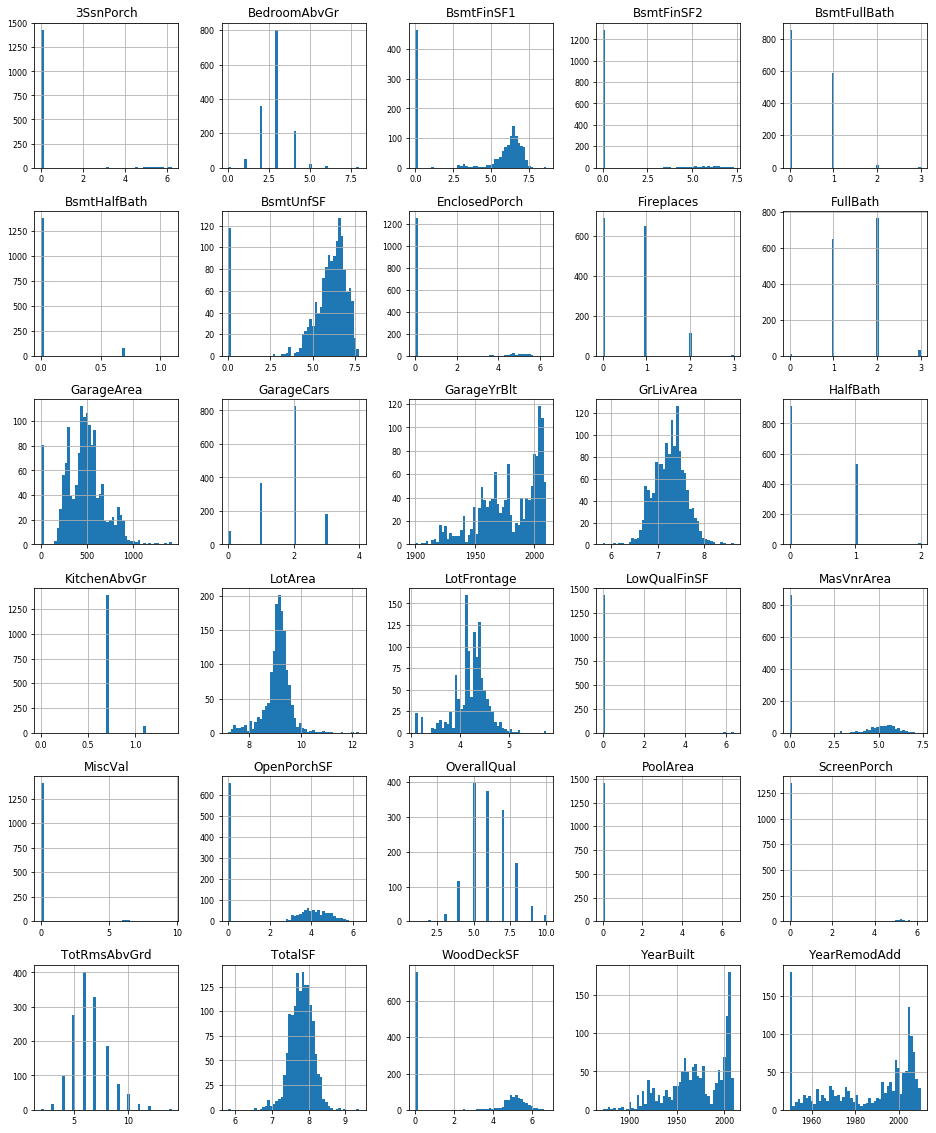

In [30]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

# 3.6 Mean Normalization

In [31]:
data_num = ((data_num - data_num.min())/(data_num.max() - data_num.min()))

In [32]:
data_num.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
0,0.413268,0.366271,0.666667,0.949275,0.883333,0.716038,0.759508,0.0,0.646838,0.0,...,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,0.572376
1,0.490307,0.391245,0.555556,0.753623,0.433333,0.000000,0.797188,0.0,0.728731,0.0,...,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,0.567740
2,0.429990,0.422289,0.666667,0.934783,0.866667,0.690361,0.716357,0.0,0.783246,0.0,...,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,0.587303
3,0.383633,0.390223,0.666667,0.311594,0.333333,0.000000,0.622780,0.0,0.811361,0.0,...,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.0,0.0,0.0,0.562004
4,0.508439,0.468694,0.777778,0.927536,0.833333,0.794318,0.750841,0.0,0.798858,0.0,...,0.75,0.589563,0.779126,0.704481,0.000000,0.0,0.0,0.0,0.0,0.646702


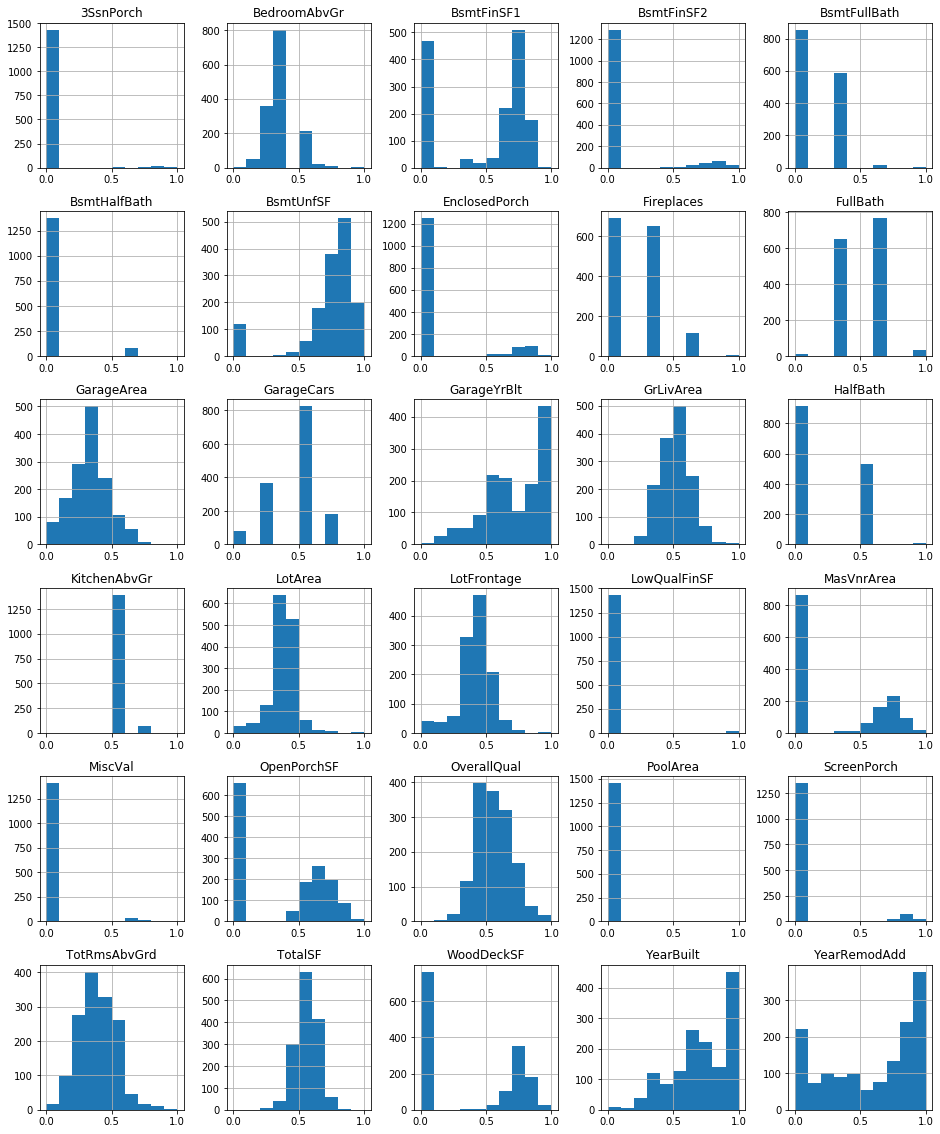

In [34]:
data_num.hist(figsize=(16, 20))
plt.show()

# 4. Missing Data Analysis

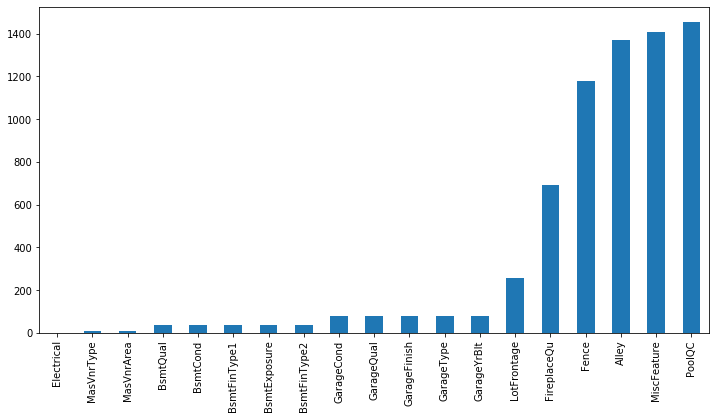

In [38]:
# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()
plt.show()

In [39]:
# Printing total numbers and percentage of missing data
null_in_HousePrice
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# 5. Missing Data Treatment

# 1 Handling Missing Values in Numerical Columns

In [43]:
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

# 2 Handling Missing Values in Categorical Columns

In [44]:
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        #print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        data_cat = data_cat.fillna(data_cat[col].mode().iloc[0])

# 6. Dummy Coding for Categorical Variables

In [45]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [46]:
# Viewing dimensionality of the DataFrame.
data_cat_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
print("Numerical features : " + str(len(data_num.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 30
Categorical features : 262


In [48]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)

# 6 Correlation

In [52]:
# Check Correlation
qw = data_num.corr()


# 7. Linear Regression Modeling

# 7.1 Preparation of Datasets

In [53]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1022, 292)
x_test  (438, 292)
y_train  (1022,)
y_test  (438,)


# 7.2 Building a Linear Regression Base Model

In [54]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, x_train).fit()
# Note the Swap of X and Y 

In [55]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     63.24
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:45:09   Log-Likelihood:                 1109.5
No. Observations:                1022   AIC:                            -1669.
Df Residuals:                     747   BIC:                            -313.4
Df Model:                         274                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0862      0.052      1.661      0.097      -0.016       0.188
LotArea                   0.5181      0.080      6.491      0.000       0.361       0.675
OverallQual               0.3161      0.051      6.217      0.000       0.216       0.416
YearBuilt                 0.2519      0.066      3.804      0.000       0.122       0.382
YearRemodAdd              0.0508      0.019      2.671      0.008       0.013       0.088
MasVnrArea                0.0555      0.050      1.111      0.267      -0.043       0.154
BsmtFinSF1                0.1187      0.056      2.105      0.036       0.008       0.229
BsmtFinSF2                0.0686      0.104      0.662      0.508      -0.135       0.272
BsmtUnfSF                -0.0271      0.027     -1.001      0.317      -0.080       0.026
LowQualFinSF              0.0124      0.041      0.305      0.761      -0.068       0.093
GrLivArea                 0.5267      0.189      2.792      0.005       0.156       0.897
BsmtFullBath              0.0899      0.031      2.902      0.004       0.029       0.151
BsmtHalfBath              0.0443      0.027      1.651      0.099      -0.008       0.097
FullBath                  0.1087      0.036      2.987      0.003       0.037       0.180
HalfBath                  0.0635      0.024      2.615      0.009       0.016       0.111
BedroomAbvGr             -0.0740      0.062     -1.186      0.236      -0.197       0.048
KitchenAbvGr             -0.1745      0.117     -1.487      0.138      -0.405       0.056
TotRmsAbvGrd              0.0483      0.060      0.809      0.419      -0.069       0.166
Fireplaces                0.0461      0.042      1.106      0.269      -0.036       0.128
GarageYrBlt              -0.0173      0.038     -0.457      0.648      -0.092       0.057
GarageCars                0.0172      0.052      0.330      0.741      -0.085       0.119
GarageArea                0.1908      0.064      2.996      0.003       0.066       0.316
WoodDeckSF                0.0408      0.010      3.912      0.000       0.020       0.061
OpenPorchSF               0.0065      0.013      0.504      0.615      -0.019       0.032
EnclosedPorch             0.0098      0.015      0.633      0.527      -0.021       0.040
3SsnPorch                -0.0005      0.034     -0.014      0.989      -0.067       0.066
ScreenPorch               0.0378      0.016      2.406      0.016       0.007       0.069
PoolArea                  6.7499      4.646      1.453      0.147      -2.372      15.872
MiscVal                  -0.0035      0.189     -0.018      0.985      -0.375       0.368
TotalSF                   1.0213      0.225      4.540      0.000       0.580       1.463
MSSubClass_160           -0.0642      0.059     -1.096      0.273      -0.179       0.051
MSSubClass_180         

# Check Multicollinearity

## Calculating Variance Inflation Factor(VIF)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
print ("\n Variance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],(x_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 Variance Inflation Factor
LotFrontage 3.972
LotArea 7.183
OverallQual 6.578
YearBuilt 23.54
YearRemodAdd 4.73
MasVnrArea 35.402
BsmtFinSF1 42.683
BsmtFinSF2 79.78
BsmtUnfSF 4.479
LowQualFinSF 2.6
GrLivArea 55.122
BsmtFullBath 3.159
BsmtHalfBath 1.733
FullBath 4.824
HalfBath 4.091
BedroomAbvGr 4.386
KitchenAbvGr 6.427
TotRmsAbvGrd 7.228
Fireplaces 8.73
GarageYrBlt 8.471
GarageCars 10.202
GarageArea 9.826
WoodDeckSF 1.809
OpenPorchSF 2.201
EnclosedPorch 2.087
3SsnPorch 1.46
ScreenPorch 1.49
PoolArea 6642.957
MiscVal 76.719
TotalSF 42.518
MSSubClass_160 17.177
MSSubClass_180 2.734
MSSubClass_190 54.394
MSSubClass_20 120.718
MSSubClass_30 25.695
MSSubClass_40 5.135
MSSubClass_45 36.467
MSSubClass_50 75.913
MSSubClass_60 131.335
MSSubClass_70 34.131
MSSubClass_75 14.068
MSSubClass_80 39.675
MSSubClass_85 12.237


C:\Users\bindu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


MSSubClass_90 inf
MSZoning_FV 17.348
MSZoning_RH 5.985
MSZoning_RL 56.025
MSZoning_RM 36.576
Street_Pave 2.132
Alley_Grvl 2.193
Alley_Pave 2.608
LotShape_IR2 1.551
LotShape_IR3 1.548
LotShape_Reg 1.939
LandContour_HLS 2.85
LandContour_Low 3.718
LandContour_Lvl 4.629
Utilities_NoSeWa 2.102
LotConfig_CulDSac 2.147
LotConfig_FR2 1.467
LotConfig_FR3 2.608
LotConfig_Inside 2.101
LandSlope_Mod 2.393
LandSlope_Sev 3.184
Neighborhood_Blueste 1.934
Neighborhood_BrDale 4.701
Neighborhood_BrkSide 13.077
Neighborhood_ClearCr 6.953
Neighborhood_CollgCr 18.152
Neighborhood_Crawfor 9.594
Neighborhood_Edwards 15.716
Neighborhood_Gilbert 10.638
Neighborhood_IDOTRR 10.403
Neighborhood_MeadowV 5.541
Neighborhood_Mitchel 8.74
Neighborhood_NAmes 29.581
Neighborhood_NPkVill 3.447
Neighborhood_NWAmes 11.448
Neighborhood_NoRidge 7.13
Neighborhood_NridgHt 10.18
Neighborhood_OldTown 23.725
Neighborhood_SWISU 5.819
Neighborhood_Sawyer 13.753
Neighborhood_SawyerW 9.438
Neighborhood_Somerst 13.933
Neighborhood_Sto

C:\Users\bindu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_PosA nan
Condition2_PosN 3.468
Condition2_RRAe 8.309
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_2fmCon 40.772
BldgType_Duplex inf
BldgType_Twnhs 16.502
BldgType_TwnhsE 37.89
HouseStyle_1.5Unf 35.687
HouseStyle_1Story 81.174
HouseStyle_2.5Fin 4.555
HouseStyle_2.5Unf 7.07
HouseStyle_2Story 56.282
HouseStyle_SFoyer 12.512
HouseStyle_SLvl 26.024
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gable 138.306
RoofStyle_Gambrel 7.969
RoofStyle_Hip 127.58
RoofStyle_Mansard 6.524
RoofStyle_Shed 7.506
RoofMatl_CompShg inf
RoofMatl_Membran nan
RoofMatl_Metal inf
RoofMatl_Roll inf
RoofMatl_Tar&Grv inf
RoofMatl_WdShake inf
RoofMatl_WdShngl inf
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.968
Exterior1st_BrkFace 21.841
Exterior1st_CBlock inf
Exterior1st_CemntBd 48.216
Exterior1st_HdBoard 85.975
Exterior1st_ImStucc 1.963
Exterior1st_MetalSd 113.548
Exterior1st_Plywood 51.97
Exter

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns

C:\Users\bindu\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [60]:
vif.round(25)

,VIF Factor,features
0,3.971745,LotFrontage
1,7.182805,LotArea
2,6.578180,OverallQual
3,23.540094,YearBuilt
4,4.729639,YearRemodAdd
...,...,...
287,1.892151,SaleCondition_AdjLand
288,2.427860,SaleCondition_Alloca
289,1.539302,SaleCondition_Family
290,3.967396,SaleCondition_Normal


#### Removing variable having VIF above 100

In [61]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip',
           'RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd',
           'GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_train if x not in vif_100]
# print(to_keep)
x_train_vif = x_train[to_keep]
x_train_vif.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,0.435403,0.386603,0.666667,0.905797,0.800000,0.860978,0.764789,0.0,0.743260,0.0,...,0,0,0,0,1,0,0,0,1,0
682,0.435403,0.156094,0.555556,0.898551,0.783333,0.000000,0.800107,0.0,0.730528,0.0,...,0,0,0,0,1,0,0,0,1,0
960,0.316280,0.335129,0.444444,0.623188,0.966667,0.000000,0.757859,0.0,0.656697,0.0,...,0,0,0,0,1,0,0,0,1,0
1384,0.383633,0.379914,0.555556,0.485507,0.000000,0.000000,0.616194,0.0,0.757770,0.0,...,0,0,0,0,1,0,0,0,1,0
1100,0.383633,0.365110,0.111111,0.347826,0.000000,0.000000,0.656747,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model2 = sm.OLS(y_train,x_train_vif).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.21
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:54:51   Log-Likelihood:                 1107.3
No. Observations:                1022   AIC:                            -1679.
Df Residuals:                     754   BIC:                            -357.5
Df Model:                         267                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0931      0.051      1.809      0.071      -0.008       0.194
LotArea                   0.5020      0.076      6.610      0.000       0.353       0.651
OverallQual               0.3200      0.050      6.398      0.000       0.222       0.418
YearBuilt                 0.2493      0.065      3.830      0.000       0.122       0.377
YearRemodAdd              0.0515      0.019      2.760      0.006       0.015       0.088
MasVnrArea                0.0622      0.050      1.252      0.211      -0.035       0.160
BsmtFinSF1                0.1248      0.056      2.229      0.026       0.015       0.235
BsmtFinSF2                0.0573      0.103      0.557      0.578      -0.145       0.259
BsmtUnfSF                -0.0265      0.027     -0.984      0.325      -0.079       0.026
LowQualFinSF              0.0127      0.041      0.312      0.755      -0.067       0.093
GrLivArea                 0.5446      0.187      2.914      0.004       0.178       0.912
BsmtFullBath              0.0923      0.031      3.008      0.003       0.032       0.152
BsmtHalfBath              0.0458      0.027      1.721      0.086      -0.006       0.098
FullBath                  0.1056      0.036      2.921      0.004       0.035       0.177
HalfBath                  0.0598      0.024      2.524      0.012       0.013       0.106
BedroomAbvGr             -0.0773      0.062     -1.249      0.212      -0.199       0.044
KitchenAbvGr             -0.1614      0.113     -1.427      0.154      -0.383       0.061
TotRmsAbvGrd              0.0566      0.059      0.953      0.341      -0.060       0.173
Fireplaces                0.0432      0.041      1.047      0.295      -0.038       0.124
GarageYrBlt              -0.0199      0.038     -0.529      0.597      -0.094       0.054
GarageCars                0.0228      0.052      0.441      0.659      -0.079       0.124
GarageArea                0.1800      0.063      2.854      0.004       0.056       0.304
WoodDeckSF                0.0402      0.010      3.887      0.000       0.020       0.061
OpenPorchSF               0.0055      0.013      0.428      0.669      -0.020       0.031
EnclosedPorch             0.0085      0.015      0.561      0.575      -0.021       0.038
3SsnPorch                -0.0011      0.034     -0.031      0.975      -0.067       0.065
ScreenPorch               0.0395      0.016      2.535      0.011       0.009       0.070
PoolArea                  6.6744      4.597      1.452      0.147      -2.350      15.699
MiscVal                   0.0164      0.188      0.087      0.930      -0.352       0.385
TotalSF                   1.0172      0.224      4.547      0.000       0.578       1.456
MSSubClass_160           -0.0428      0.034     -1.244      0.214      -0.110       0.025
MSSubClass_180         

In [63]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     63.24
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:58:41   Log-Likelihood:                 1109.5
No. Observations:                1022   AIC:                            -1669.
Df Residuals:                     747   BIC:                            -313.4
Df Model:                         274                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0862      0.052      1.661      0.097      -0.016       0.188
LotArea                   0.5181      0.080      6.491      0.000       0.361       0.675
OverallQual               0.3161      0.051      6.217      0.000       0.216       0.416
YearBuilt                 0.2519      0.066      3.804      0.000       0.122       0.382
YearRemodAdd              0.0508      0.019      2.671      0.008       0.013       0.088
MasVnrArea                0.0555      0.050      1.111      0.267      -0.043       0.154
BsmtFinSF1                0.1187      0.056      2.105      0.036       0.008       0.229
BsmtFinSF2                0.0686      0.104      0.662      0.508      -0.135       0.272
BsmtUnfSF                -0.0271      0.027     -1.001      0.317      -0.080       0.026
LowQualFinSF              0.0124      0.041      0.305      0.761      -0.068       0.093
GrLivArea                 0.5267      0.189      2.792      0.005       0.156       0.897
BsmtFullBath              0.0899      0.031      2.902      0.004       0.029       0.151
BsmtHalfBath              0.0443      0.027      1.651      0.099      -0.008       0.097
FullBath                  0.1087      0.036      2.987      0.003       0.037       0.180
HalfBath                  0.0635      0.024      2.615      0.009       0.016       0.111
BedroomAbvGr             -0.0740      0.062     -1.186      0.236      -0.197       0.048
KitchenAbvGr             -0.1745      0.117     -1.487      0.138      -0.405       0.056
TotRmsAbvGrd              0.0483      0.060      0.809      0.419      -0.069       0.166
Fireplaces                0.0461      0.042      1.106      0.269      -0.036       0.128
GarageYrBlt              -0.0173      0.038     -0.457      0.648      -0.092       0.057
GarageCars                0.0172      0.052      0.330      0.741      -0.085       0.119
GarageArea                0.1908      0.064      2.996      0.003       0.066       0.316
WoodDeckSF                0.0408      0.010      3.912      0.000       0.020       0.061
OpenPorchSF               0.0065      0.013      0.504      0.615      -0.019       0.032
EnclosedPorch             0.0098      0.015      0.633      0.527      -0.021       0.040
3SsnPorch                -0.0005      0.034     -0.014      0.989      -0.067       0.066
ScreenPorch               0.0378      0.016      2.406      0.016       0.007       0.069
PoolArea                  6.7499      4.646      1.453      0.147      -2.372      15.872
MiscVal                  -0.0035      0.189     -0.018      0.985      -0.375       0.368
TotalSF                   1.0213      0.225      4.540      0.000       0.580       1.463
MSSubClass_160           -0.0642      0.059     -1.096      0.273      -0.179       0.051
MSSubClass_180         

In [64]:
def rmse(predictions, targets):

    differences = predictions - targets                       # the DIFFERENCEs.

    differences_squared = differences ** 2                    # the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^

    return rmse_val 

In [66]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test)

In [67]:

tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(predictions1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958673,0.943514,0.595569


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns

C:\Users\bindu\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\bindu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [70]:
vif.round(3)

,VIF Factor,features
0,3.972,LotFrontage
1,7.183,LotArea
2,6.578,OverallQual
3,23.540,YearBuilt
4,4.730,YearRemodAdd
...,...,...
287,1.892,SaleCondition_AdjLand
288,2.428,SaleCondition_Alloca
289,1.539,SaleCondition_Family
290,3.967,SaleCondition_Normal
